In [1]:
#Only needs to be run once to install a dependency !conda install xlrd
#Needed to also run !conda install openpyxl
#Make sure VADER is installed: pip install vaderSentiment

In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

In [3]:
oly_uniq = pd.read_csv('Olympics_Postponed_Twitter_Unique.csv')
oly_uniq.keys()

Index(['Date', 'Title', 'Url', 'Language', 'Author', 'Avatar',
       'Category Details', 'Checked', 'City', 'Display URLs', 'Expanded URLs',
       'Full Name', 'Full Text', 'Gender', 'Hashtags', 'Impact', 'Impressions',
       'Latitude', 'Location Name', 'Longitude', 'Media Filter', 'Media URLs',
       'Mentioned Authors', 'Original Url', 'Thread Author',
       'Thread Created Date', 'Thread Entry Type', 'Thread Id', 'Thread URL',
       'Twitter Author ID', 'Twitter Channel Role', 'Twitter Followers',
       'Twitter Following', 'Twitter Reply Count', 'Twitter Reply to',
       'Twitter Retweet of', 'Twitter Retweets', 'Twitter Tweets',
       'Twitter Verified', 'Updated', 'Reach (new)'],
      dtype='object')

In [4]:
oly_uniq['Language'].head(20)

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     it
9     en
10    en
11    es
12    de
13    en
14    en
15    en
16    es
17    en
18    en
19    en
Name: Language, dtype: object

In [5]:
en_only = oly_uniq.loc[oly_uniq['Language'] == 'en']
en_only

,Date,Title,Url,Language,Author,Avatar,Category Details,Checked,City,Display URLs,...,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Reply to,Twitter Retweet of,Twitter Retweets,Twitter Tweets,Twitter Verified,Updated,Reach (new)
0,2020-03-31 23:58:48.0,@TeamUSA Literally all of the 2012 Olympics fo...,http://twitter.com/arv5518/statuses/1245138508...,en,arv5518,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,3,76,0,http://twitter.com/TeamUSA/statuses/1245063460...,NaN,0,345,False,2020-10-05T16:39:32.631+0000,0
1,2020-03-31 23:57:17.0,@LanderVBALL @reesebatesvb @vbcoch @USAVBeach ...,http://twitter.com/alexptck3/statuses/12451381...,en,alexptck3,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,217,293,1,http://twitter.com/LanderVBALL/statuses/124511...,NaN,0,1600,False,2020-10-05T16:39:32.613+0000,9
2,2020-03-31 23:57:00.0,"""To be blunt, it started women's basketball in...",http://twitter.com/NBCOlympics/statuses/124513...,en,NBCOlympics,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,922572,2991,2,NaN,NaN,61,32017,True,2020-10-05T16:39:32.615+0000,67412
3,2020-03-31 23:56:25.0,@DetroitHandball @TeamHandball @USATH @USARugb...,http://twitter.com/CoachJax11/statuses/1245137...,en,CoachJax11,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,158,249,1,http://twitter.com/DetroitHandball/statuses/12...,NaN,0,792,False,2020-10-05T16:39:32.602+0000,0
4,2020-03-31 23:55:31.0,I beat my own record! The new one is 52!!! @US...,http://twitter.com/reesebatesvb/statuses/12451...,en,reesebatesvb,https://audiences.brandwatch.com/api/audiences...,NaN,False,Kansas City,NaN,...,30,79,0,NaN,NaN,1,24,False,2020-10-05T16:39:32.631+0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,2020-03-22 00:02:31.0,Wrestling is on!!! Thanks @USAWrestling for th...,http://twitter.com/TheCoachKenney/statuses/124...,en,TheCoachKenney,https://audiences.brandwatch.com/api/audiences...,NaN,False,Plano,NaN,...,982,1830,0,NaN,NaN,2,2254,False,2020-10-05T16:39:44.187+0000,1373
19710,2020-03-22 00:02:11.0,@mitchell_ness @usabasketball Hell yes! I’d bu...,http://twitter.com/cmbfarrell/statuses/1241515...,en,cmbfarrell,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,NaN,...,538,1043,0,http://twitter.com/mitchell_ness/statuses/1241...,NaN,0,12037,False,2020-10-05T16:39:44.187+0000,0
19711,2020-03-22 00:01:41.0,@nelses1 @PLBpalhal_ @MilenaUjkicWick @Noah_Ha...,http://twitter.com/cwillaert/statuses/12415153...,en,cwillaert,https://audiences.brandwatch.com/api/audiences...,NaN,False,Mankato,NaN,...,434,2348,1,http://twitter.com/cwillaert/statuses/12415125...,NaN,0,4590,False,2020-10-05T16:39:44.160+0000,599
19712,2020-03-22 00:01:17.0,Y’all tomorrow morning get your sweat on with ...,http://twitter.com/TexasVolleyball/statuses/12...,en,TexasVolleyball,https://audiences.brandwatch.com/api/audiences...,NaN,False,Austin,NaN,...,43519,92,1,NaN,NaN,8,17129,True,2020-10-05T16:39:44.188+0000,17282


In [6]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [7]:
print(en_only['Full Text'][3])
print(analyser.polarity_scores(en_only['Full Text'][3]))

@DetroitHandball @TeamHandball @USATH @USARugby I still love u
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}


In [8]:
en_only['vader_scores'] = [analyser.polarity_scores(x) for x in en_only['Full Text']]
en_only['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...
3     {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...
6     {'neg': 0.044, 'neu': 0.956, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...
13    {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
14    {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...
15    {'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'comp...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
18    {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
19    {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'comp...
21    {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...
22    {'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'co

In [9]:
en_only['vader_scores'][2]['pos']

0.098

In [10]:
en_only['pos'] = [x['pos'] for x in en_only['vader_scores']]
en_only['pos']

0        0.000
1        0.000
2        0.098
3        0.375
4        0.000
         ...  
19709    0.296
19710    0.170
19711    0.032
19712    0.000
19713    0.000
Name: pos, Length: 13997, dtype: float64

In [11]:
from matplotlib import pyplot as plt

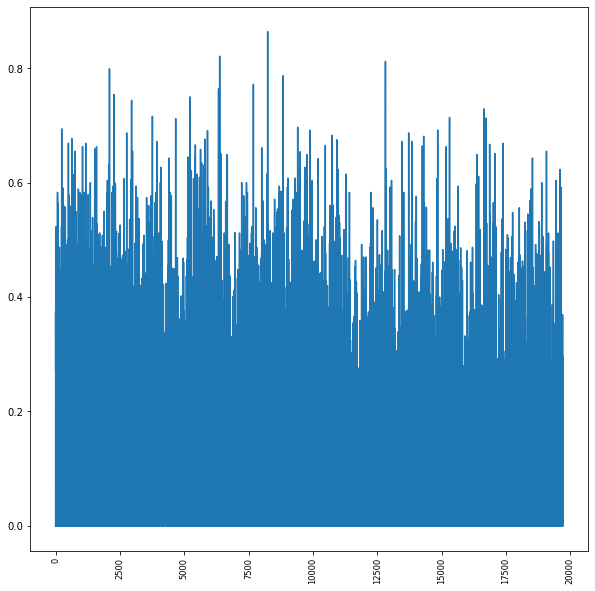

In [12]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

In [13]:
type(en_only['Date'][0])

str

In [14]:
from datetime import datetime as dt

In [15]:
en_only['Datetime'] = [dt.strptime(x, '%Y-%m-%d %H:%M:%S.%f') for x in en_only['Date']]
print(type(en_only['Datetime'][0]))
print(en_only['Datetime'][0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-03-31 23:58:48


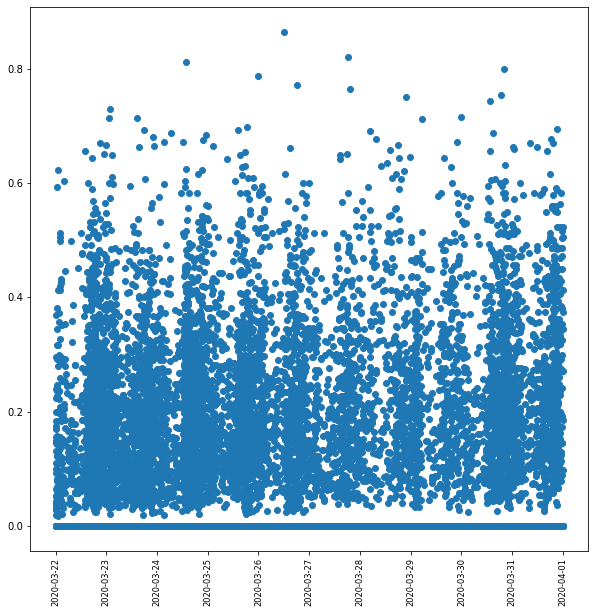

In [16]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(en_only['Datetime'], en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

In [17]:
pre_announce = en_only.loc[en_only['Datetime'] < '2020-03-24 00:00:00.0'].reset_index()
pre_announce

,index,Date,Title,Url,Language,Author,Avatar,Category Details,Checked,City,...,Twitter Reply to,Twitter Retweet of,Twitter Retweets,Twitter Tweets,Twitter Verified,Updated,Reach (new),vader_scores,pos,Datetime
0,14126,2020-03-23 23:58:18.0,@Sportsnet @Tokyo2020 Why there not competing,http://twitter.com/brad69155150/statuses/12422...,en,brad69155150,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,http://twitter.com/Sportsnet/statuses/12420818...,NaN,0,1028,False,2020-10-05T16:39:20.852+0000,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-03-23 23:58:18
1,14127,2020-03-23 23:57:33.0,@monicaabbott We need a Mercy Rule for this Vi...,http://twitter.com/bude149/statuses/1242239090...,en,bude149,https://audiences.brandwatch.com/api/audiences...,NaN,False,New York,...,http://twitter.com/monicaabbott/statuses/12420...,NaN,0,2160,False,2020-10-05T16:39:20.855+0000,0,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.217,2020-03-23 23:57:33
2,14128,2020-03-23 23:57:16.0,Do it now please @Tokyo2020,http://twitter.com/Ozsancak/statuses/124223902...,en,Ozsancak,https://audiences.brandwatch.com/api/audiences...,NaN,False,"Washington, D.C.",...,NaN,NaN,0,3889,False,2020-10-05T16:39:20.851+0000,0,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...",0.365,2020-03-23 23:57:16
3,14129,2020-03-23 23:56:50.0,@sbregman87 @Aly_Raisman @TeamUSA @Simone_Bile...,http://twitter.com/pabloalvarezap/statuses/124...,en,pabloalvarezap,https://audiences.brandwatch.com/api/audiences...,NaN,False,Santiago,...,http://twitter.com/sbregman87/statuses/1242112...,NaN,0,1114,False,2020-10-05T16:39:20.856+0000,317,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",0.205,2020-03-23 23:56:50
4,14130,2020-03-23 23:56:44.0,@KarissaSchweiz4 @Nike @WorldAthletics @TeamUS...,http://twitter.com/btm123/statuses/12422388842...,en,btm123,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,http://twitter.com/KarissaSchweiz4/statuses/12...,NaN,0,386,False,2020-10-05T16:39:20.848+0000,0,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.109,2020-03-23 23:56:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4058,19709,2020-03-22 00:02:31.0,Wrestling is on!!! Thanks @USAWrestling for th...,http://twitter.com/TheCoachKenney/statuses/124...,en,TheCoachKenney,https://audiences.brandwatch.com/api/audiences...,NaN,False,Plano,...,NaN,NaN,2,2254,False,2020-10-05T16:39:44.187+0000,1373,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.296,2020-03-22 00:02:31
4059,19710,2020-03-22 00:02:11.0,@mitchell_ness @usabasketball Hell yes! I’d bu...,http://twitter.com/cmbfarrell/statuses/1241515...,en,cmbfarrell,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,http://twitter.com/mitchell_ness/statuses/1241...,NaN,0,12037,False,2020-10-05T16:39:44.187+0000,0,"{'neg': 0.326, 'neu': 0.504, 'pos': 0.17, 'com...",0.170,2020-03-22 00:02:11
4060,19711,2020-03-22 00:01:41.0,@nelses1 @PLBpalhal_ @MilenaUjkicWick @Noah_Ha...,http://twitter.com/cwillaert/statuses/12415153...,en,cwillaert,https://audiences.brandwatch.com/api/audiences...,NaN,False,Mankato,...,http://twitter.com/cwillaert/statuses/12415125...,NaN,0,4590,False,2020-10-05T16:39:44.160+0000,599,"{'neg': 0.0, 'neu': 0.968, 'pos': 0.032, 'comp...",0.032,2020-03-22 00:01:41
4061,19712,2020-03-22 00:01:17.0,Y’all tomorrow morning get your sweat on with ...,http://twitter.com/TexasVolleyball/statuses/12...,en,TexasVolleyball,https://audiences.brandwatch.com/api/audiences...,NaN,False,Austin,...,NaN,NaN,8,17129,True,2020-10-05T16:39:44.188+0000,17282,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-03-22 00:01:17


In [18]:
post_announce = en_only.loc[en_only['Datetime'] > '2020-03-24 00:00:00.0'].reset_index()
post_announce

,index,Date,Title,Url,Language,Author,Avatar,Category Details,Checked,City,...,Twitter Reply to,Twitter Retweet of,Twitter Retweets,Twitter Tweets,Twitter Verified,Updated,Reach (new),vader_scores,pos,Datetime
0,0,2020-03-31 23:58:48.0,@TeamUSA Literally all of the 2012 Olympics fo...,http://twitter.com/arv5518/statuses/1245138508...,en,arv5518,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,http://twitter.com/TeamUSA/statuses/1245063460...,NaN,0,345,False,2020-10-05T16:39:32.631+0000,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-03-31 23:58:48
1,1,2020-03-31 23:57:17.0,@LanderVBALL @reesebatesvb @vbcoch @USAVBeach ...,http://twitter.com/alexptck3/statuses/12451381...,en,alexptck3,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,http://twitter.com/LanderVBALL/statuses/124511...,NaN,0,1600,False,2020-10-05T16:39:32.613+0000,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-03-31 23:57:17
2,2,2020-03-31 23:57:00.0,"""To be blunt, it started women's basketball in...",http://twitter.com/NBCOlympics/statuses/124513...,en,NBCOlympics,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,NaN,61,32017,True,2020-10-05T16:39:32.615+0000,67412,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",0.098,2020-03-31 23:57:00
3,3,2020-03-31 23:56:25.0,@DetroitHandball @TeamHandball @USATH @USARugb...,http://twitter.com/CoachJax11/statuses/1245137...,en,CoachJax11,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,http://twitter.com/DetroitHandball/statuses/12...,NaN,0,792,False,2020-10-05T16:39:32.602+0000,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,2020-03-31 23:56:25
4,4,2020-03-31 23:55:31.0,I beat my own record! The new one is 52!!! @US...,http://twitter.com/reesebatesvb/statuses/12451...,en,reesebatesvb,https://audiences.brandwatch.com/api/audiences...,NaN,False,Kansas City,...,NaN,NaN,1,24,False,2020-10-05T16:39:32.631+0000,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-03-31 23:55:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,14118,2020-03-24 00:04:07.0,@USASwimming Here's Minnie. Surprised we got h...,http://twitter.com/golfinganchor/statuses/1242...,en,golfinganchor,https://audiences.brandwatch.com/api/audiences...,NaN,False,Rapid City,...,http://twitter.com/USASwimming/statuses/124218...,NaN,1,2876,False,2020-10-05T16:39:22.733+0000,0,"{'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'comp...",0.083,2020-03-24 00:04:07
9930,14120,2020-03-24 00:02:53.0,@Seth_Everett still nothing official from @Oly...,http://twitter.com/MarcErnay/statuses/12422404...,en,MarcErnay,https://audiences.brandwatch.com/api/audiences...,NaN,False,New York,...,http://twitter.com/Seth_Everett/statuses/12421...,NaN,0,30643,False,2020-10-05T16:39:22.735+0000,832,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-03-24 00:02:53
9931,14121,2020-03-24 00:02:53.0,#FredHansen #Olympics #Medalist @TeamUSA @Olym...,http://twitter.com/memorabiliaddy/statuses/124...,en,memorabiliaddy,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,NaN,0,47133,False,2020-10-05T16:39:22.737+0000,498,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-03-24 00:02:53
9932,14122,2020-03-24 00:02:46.0,"“On the basis of the information the IOC has, ...",http://twitter.com/sashadigiulian/statuses/124...,en,sashadigiulian,https://audiences.brandwatch.com/api/audiences...,NaN,False,NaN,...,NaN,NaN,3,8469,True,2020-10-05T16:39:22.733+0000,14511,"{'neg': 0.034, 'neu': 0.966, 'pos': 0.0, 'comp...",0.000,2020-03-24 00:02:46


In [19]:
from scipy import stats

In [20]:
stats.describe(pre_announce['pos']).mean

0.10833103618016245

In [21]:
stats.describe(post_announce['pos']).mean

0.13627400845580837

In [22]:
stats.ttest_ind(pre_announce['pos'], post_announce['pos'])

Ttest_indResult(statistic=-10.431660370314153, pvalue=2.202370672221694e-25)